# 库导入 Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from imblearn.under_sampling import TomekLinks
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

Using TensorFlow backend.


# 数据导入 Data Load

In [2]:
data = pd.read_csv('Model_Test_Data.csv')

# 基本数据探索 Basic Inspection & Understanding of data

In [3]:
print ("Number of samples:", data.shape[0])
print ("Number of features:", data.shape[1])

Number of samples: 10232
Number of features: 47


In [4]:
data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x038,x039,x040,x041,x042,x043,x044,x045,x046,re
0,1,0.431818,2,0.005455,1,6,5,1,1,2,...,0.000000,0.00000,0.6588,0.073225,0.076532,0.000115,2,2,0.036070,1
1,1,0.227273,1,0.001455,2,1,1,1,1,1,...,0.023247,0.32681,0.4811,0.210988,0.016466,0.000096,1,2,0.052693,1
2,2,0.363636,2,0.000909,1,6,3,1,2,1,...,0.000000,0.00000,0.0192,0.000000,0.002898,0.000160,1,1,0.010971,1
3,1,0.522727,2,0.003636,1,7,6,2,2,1,...,0.000000,0.00000,0.0001,0.000000,0.001000,0.000099,2,1,0.008311,1
4,1,0.727273,2,0.018182,3,8,3,2,1,2,...,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,2,1,0.013797,1


In [5]:
data.dtypes.value_counts()

float64    35
int64      12
dtype: int64

变量类别计算，35个连续变量，12个类别变量（包括目标变量）

containing 35 continuous features, 12 categorical features (include the target feature)

In [6]:
count_miss_val = data.isnull().sum()
count_miss_val.sum()

0

No missing value (NA) found in this dataset, missing value could be in the form of 0. 
Further method of identifying & processing missing value would be taken later.

数据中没有包含NA值（缺失值）

# 变量类型转换 Change int variables to categorical variables

In [7]:
data_ad = data

for i in data_ad.columns:
    if data_ad[i].dtype == 'int64':
        data_ad[i] = data_ad[i].astype('object')

data_ad.dtypes.value_counts()

float64    35
object     12
dtype: int64

Change the variable 'educaion level to ordinal variable'

In [8]:
#data_ad['x005'] =  data_ad['x005'].astype('int')
#edu_lvl_map = {1: 14, 2: 9, 3: 12, 
#               4: 24, 5: 19, 6: 6, 7:16}
#data_ad['x005'] = data_ad['x005'].map(edu_lvl_map)

In [9]:
data_ad.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017', 'x018',
       'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026', 'x027',
       'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035', 'x036',
       'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044', 'x045',
       'x046', 're'],
      dtype='object')

# 变量分布观察 Distribution Inspection (histogram)

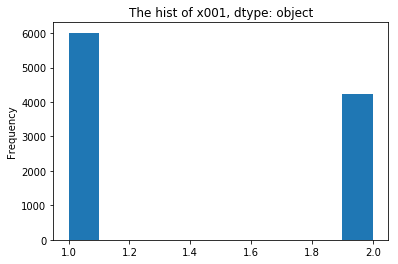

x001 [1 2] 2


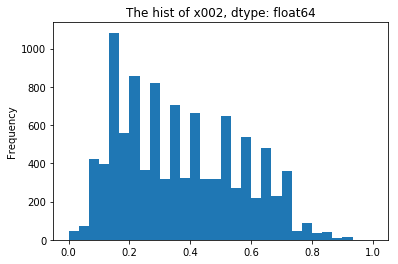

x002 43
count    10232.000000
mean         0.365171
std          0.196054
min          0.000000
25%          0.181818
50%          0.340909
75%          0.522727
max          1.000000
Name: x002, dtype: float64


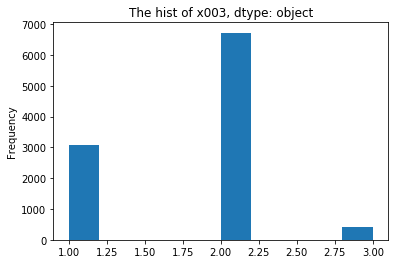

x003 [2 1 3] 3


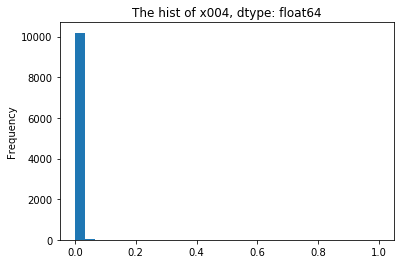

x004 182
count    10232.000000
mean         0.001761
std          0.011927
min          0.000000
25%          0.000618
50%          0.000909
75%          0.001309
max          1.000000
Name: x004, dtype: float64


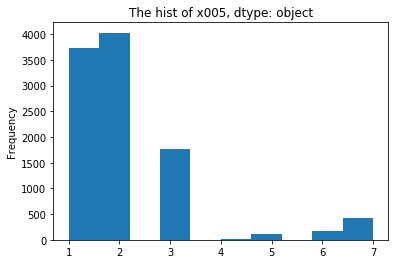

x005 [1 2 3 5 7 6 4] 7


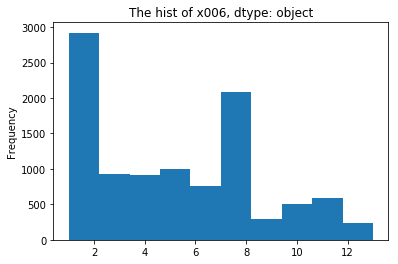

x006 [6 1 7 8 9 5 10 4 3 12 11 2 13] 13


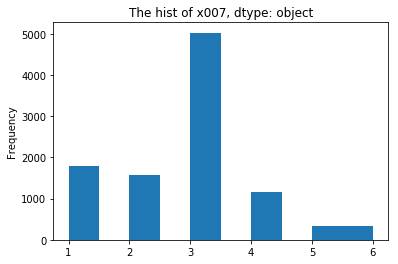

x007 [5 1 3 6 4 2] 6


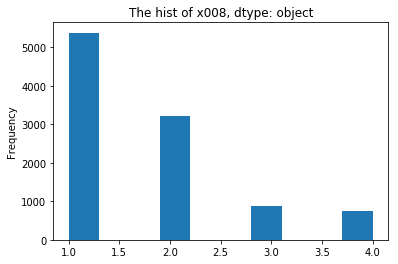

x008 [1 2 3 4] 4


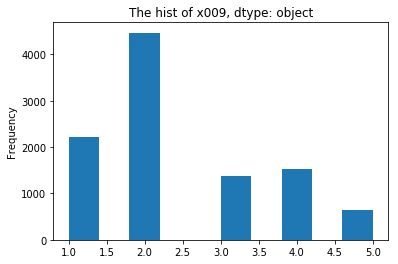

x009 [1 2 4 3 5] 5


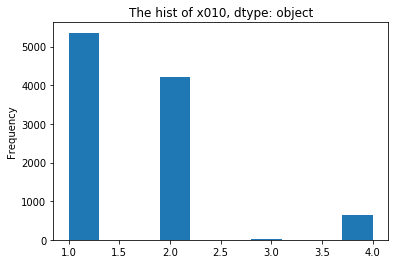

x010 [2 1 4 3] 4


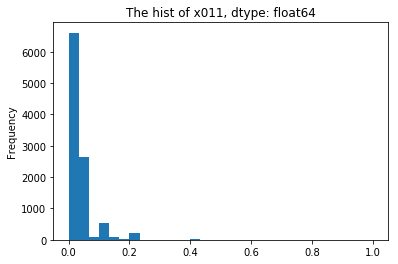

x011 76
count    10232.000000
mean         0.037929
std          0.044261
min          0.000000
25%          0.016000
50%          0.024000
75%          0.040000
max          1.000000
Name: x011, dtype: float64


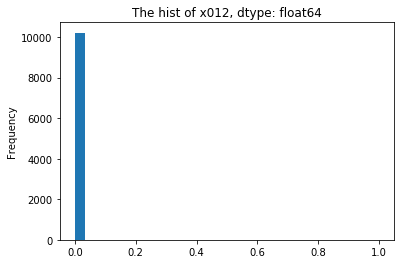

x012 13
count    10232.000000
mean         0.000799
std          0.020356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x012, dtype: float64


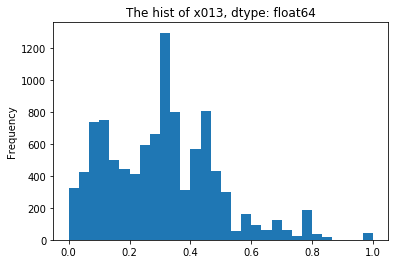

x013 55
count    10232.000000
mean         0.307338
std          0.181324
min          0.000000
25%          0.158730
50%          0.301587
75%          0.428571
max          1.000000
Name: x013, dtype: float64


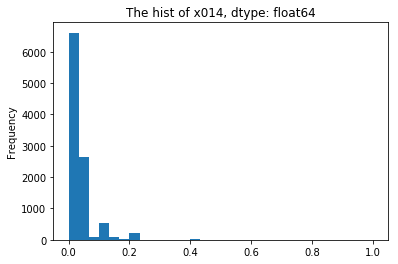

x014 78
count    10232.000000
mean         0.037944
std          0.044286
min          0.000000
25%          0.016000
50%          0.024000
75%          0.040000
max          1.000000
Name: x014, dtype: float64


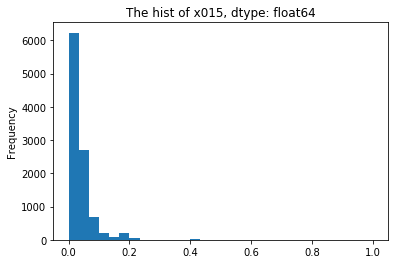

x015 126
count    10232.000000
mean         0.039927
std          0.058080
min          0.000000
25%          0.016364
50%          0.027273
75%          0.045455
max          1.000000
Name: x015, dtype: float64


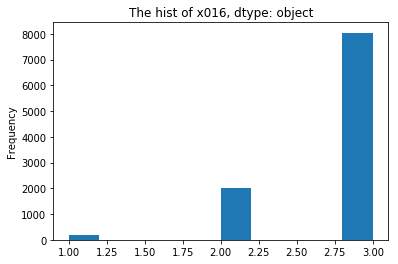

x016 [2 3 1] 3


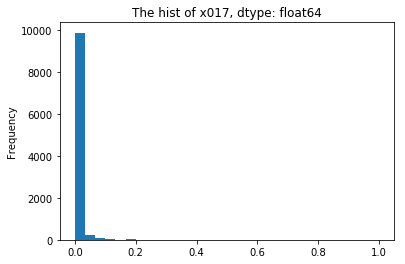

x017 4101
count    10232.000000
mean         0.006833
std          0.020426
min          0.000000
25%          0.001570
50%          0.001789
75%          0.004864
max          1.000000
Name: x017, dtype: float64


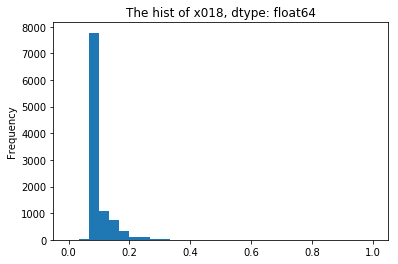

x018 40
count    10232.000000
mean         0.097336
std          0.042087
min          0.000000
25%          0.074074
50%          0.086420
75%          0.098765
max          1.000000
Name: x018, dtype: float64


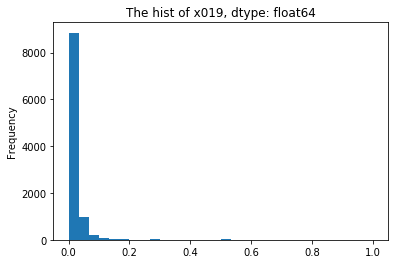

x019 4166
count    10232.000000
mean         0.032961
std          0.031623
min          0.000000
25%          0.026048
50%          0.026426
75%          0.028719
max          1.000000
Name: x019, dtype: float64


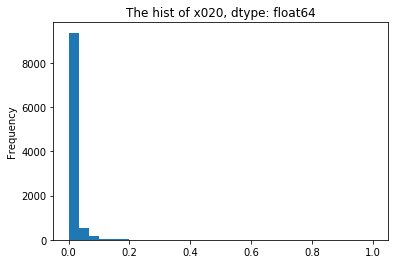

x020 97
count    10232.000000
mean         0.007416
std          0.028326
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x020, dtype: float64


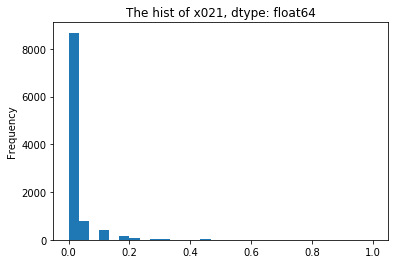

x021 15
count    10232.000000
mean         0.017022
std          0.052084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x021, dtype: float64


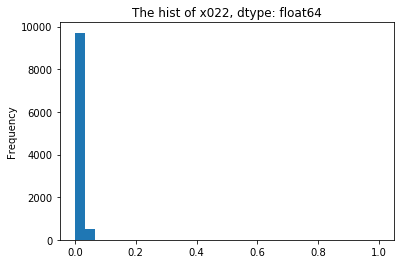

x022 147
count    10232.000000
mean         0.004162
std          0.015244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x022, dtype: float64


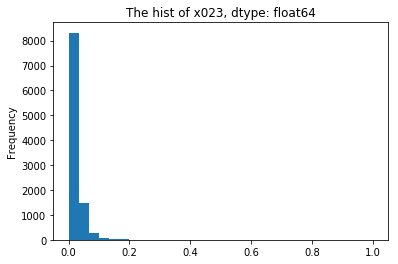

x023 1696
count    10232.000000
mean         0.033547
std          0.026243
min          0.000000
25%          0.026820
50%          0.026820
75%          0.026820
max          1.000000
Name: x023, dtype: float64


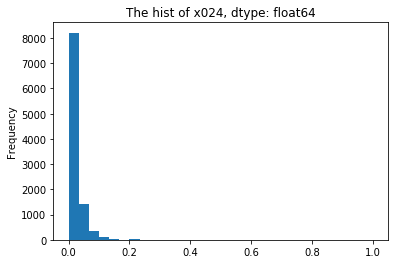

x024 21
count    10232.000000
mean         0.029158
std          0.031497
min          0.000000
25%          0.018182
50%          0.018182
75%          0.018182
max          1.000000
Name: x024, dtype: float64


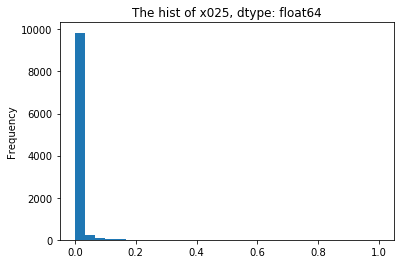

x025 1701
count    10232.000000
mean         0.005538
std          0.022944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x025, dtype: float64


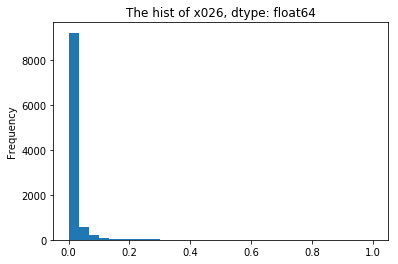

x026 8479
count    10232.000000
mean         0.015521
std          0.038490
min          0.000000
25%          0.001385
50%          0.004933
75%          0.013739
max          1.000000
Name: x026, dtype: float64


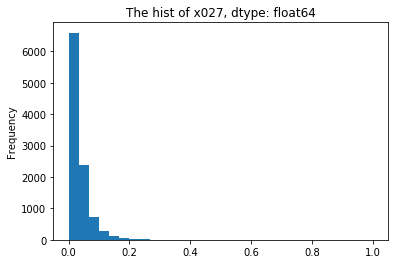

x027 110
count    10232.000000
mean         0.034248
std          0.037726
min          0.000000
25%          0.011092
50%          0.022353
75%          0.042017
max          1.000000
Name: x027, dtype: float64


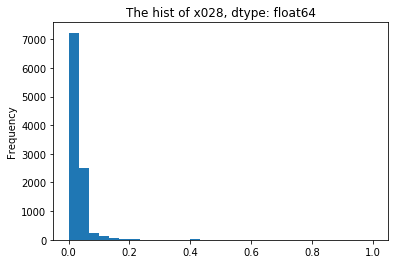

x028 8616
count    10232.000000
mean         0.037481
std          0.030788
min          0.000000
25%          0.028027
50%          0.029812
75%          0.035033
max          1.000000
Name: x028, dtype: float64


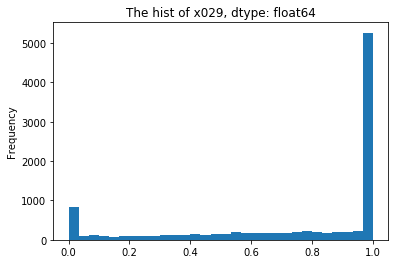

x029 4376
count    10232.000000
mean         0.744856
std          0.343126
min          0.000000
25%          0.539101
50%          0.985891
75%          1.000000
max          1.000000
Name: x029, dtype: float64


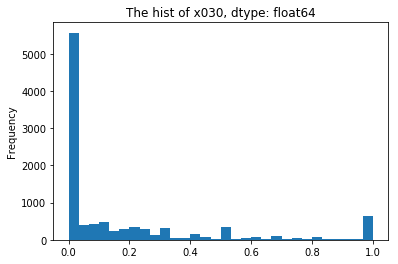

x030 378
count    10232.000000
mean         0.170697
std          0.282012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.222200
max          1.000000
Name: x030, dtype: float64


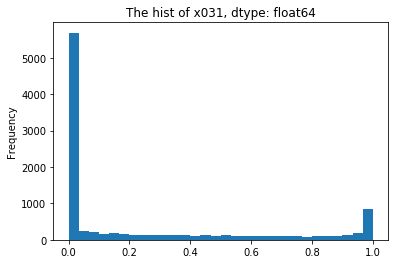

x031 4155
count    10232.000000
mean         0.245356
std          0.352225
min          0.000000
25%          0.000000
50%          0.000000
75%          0.462328
max          1.000000
Name: x031, dtype: float64


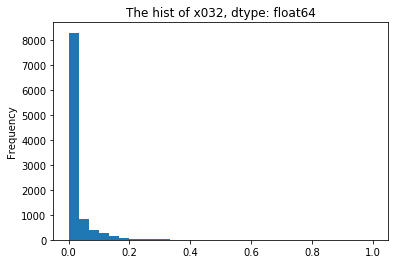

x032 389
count    10232.000000
mean         0.022654
std          0.055069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020619
max          1.000000
Name: x032, dtype: float64


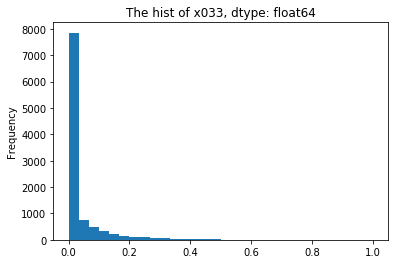

x033 48
count    10232.000000
mean         0.036508
std          0.079253
min          0.000000
25%          0.000000
50%          0.000000
75%          0.032448
max          1.000000
Name: x033, dtype: float64


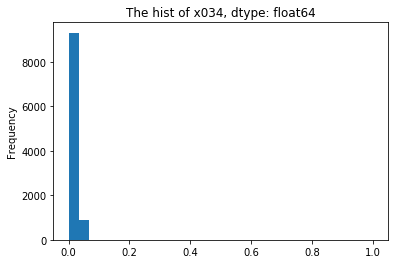

x034 834
count    10232.000000
mean         0.009165
std          0.019974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.014815
max          1.000000
Name: x034, dtype: float64


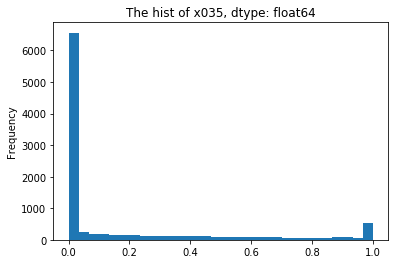

x035 3415
count    10232.000000
mean         0.174741
std          0.303733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.233541
max          1.000000
Name: x035, dtype: float64


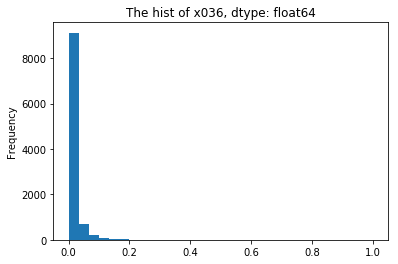

x036 2286
count    10232.000000
mean         0.011385
std          0.040107
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x036, dtype: float64


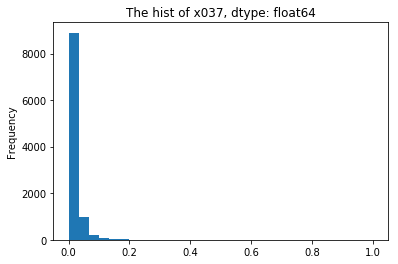

x037 70
count    10232.000000
mean         0.009868
std          0.028347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x037, dtype: float64


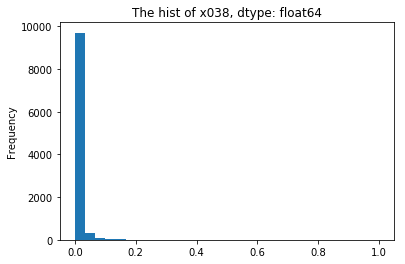

x038 2255
count    10232.000000
mean         0.007543
std          0.030891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x038, dtype: float64


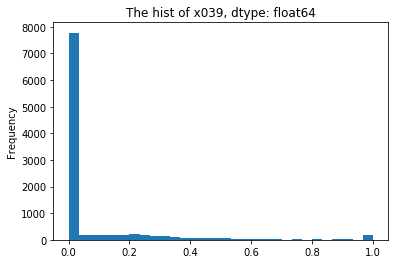

x039 2328
count    10232.000000
mean         0.080403
std          0.194301
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: x039, dtype: float64


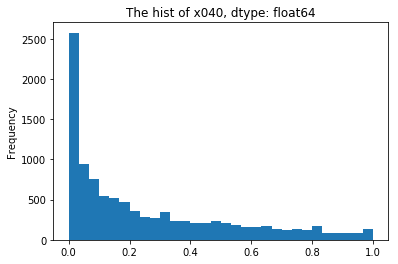

x040 4927
count    10232.000000
mean         0.256993
std          0.271165
min          0.000000
25%          0.033200
50%          0.153950
75%          0.418800
max          1.000000
Name: x040, dtype: float64


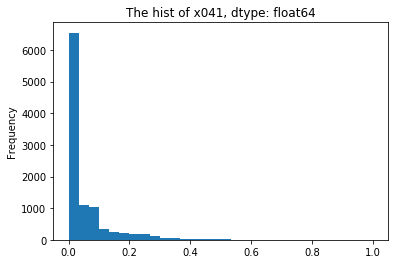

x041 2347
count    10232.000000
mean         0.049960
std          0.090413
min          0.000000
25%          0.000000
50%          0.006785
75%          0.067702
max          1.000000
Name: x041, dtype: float64


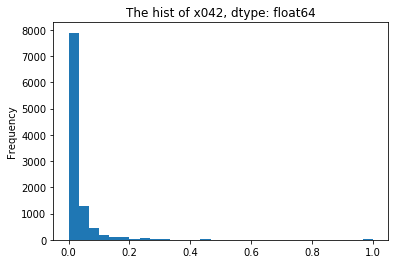

x042 6821
count    10232.000000
mean         0.032557
std          0.074059
min          0.000000
25%          0.004842
50%          0.012941
75%          0.030987
max          1.000000
Name: x042, dtype: float64


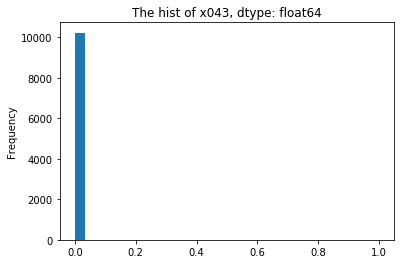

x043 8635
count    10232.000000
mean         0.000362
std          0.010328
min          0.000000
25%          0.000074
50%          0.000099
75%          0.000135
max          1.000000
Name: x043, dtype: float64


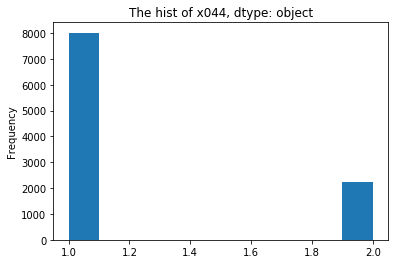

x044 [2 1] 2


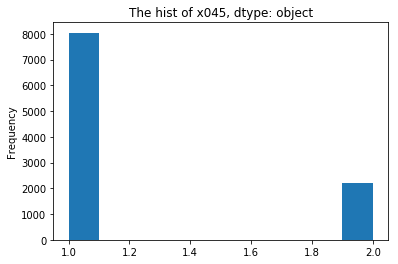

x045 [2 1] 2


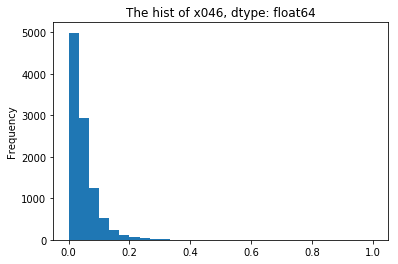

x046 232
count    10232.000000
mean         0.049448
std          0.049613
min          0.000000
25%          0.019282
50%          0.035904
75%          0.063664
max          1.000000
Name: x046, dtype: float64


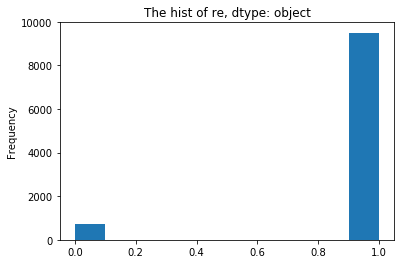

re [1 0] 2


In [10]:
for i in data_ad.columns:
    if data_ad[i].dtype == 'object':
        #print (i)
        data_ad[i].astype(int).plot.hist()
        plt.title("The hist of {}, dtype: {}".format(i, data_ad[i].dtype))
        plt.show()
        print (i, data_ad[i].unique(), len(data_ad[i].unique()))
    else:
        data_ad[i].plot.hist(30)
        plt.title("The hist of {}, dtype: {}".format(i, data_ad[i].dtype))
        plt.show()
        print (i, len(data_ad[i].unique()))
        print (data_ad[i].describe())

In [11]:
#data['x002']
income = pd.cut(data_ad['x002'], 5)
for i in income.unique():

    print (sum(income == i), i)

2751 (0.4, 0.6]
3386 (0.2, 0.4]
1413 (0.6, 0.8]
2578 (-0.001, 0.2]
104 (0.8, 1.0]


The name of the variable x012 is identified as income.

通过分布与字段码值表对比发现变量x012为收入

# 筛选异常值

In [12]:
for i in data_ad.columns:
    if data_ad[i].dtype == 'float64':
        if sum(data_ad[i] == 0)/len(data_ad) >= 0.70:
            print (i)

x012
x020
x021
x022
x025
x036
x037
x038
x039


观察连续变量分布，并没有发现变量中有不符合数据分布规律，或者不符合实际情况的异常值。

但连续变量x012, x020, x021, x022, x025, x036, x037, x038, x039有70%以上的值为0.

但是由于数据中违约：非违约比例约为1:9。因此不能将0值看作缺失值。

Did not identify any abnormal value or outlier in the dataset.

# 分类变量码值数量  variables' unqiue value count

In [13]:
for i in data_ad.columns:
    if data_ad[i].dtype == 'object':
        print (i,len(data_ad[i].unique()), data_ad[i].dtype)

x001 2 object
x003 3 object
x005 7 object
x006 13 object
x007 6 object
x008 4 object
x009 5 object
x010 4 object
x016 3 object
x044 2 object
x045 2 object
re 2 object


所有分类变量的可能值。

分类变量对应的中文名称：

x001 - 性别

x002 - 收入

x003 - 婚姻状况

x005 - 受教育程度

x006 - 单位性质代码

x007 - 行业类型代码

x008 - 与我行关系代码

x009 - 进件来源代码

x010 - 产品编号

x016 - 卡片种类

x044 - 是否关联还款

x045 - 最近6期是否发生过逾期

# 目标变量分布检验

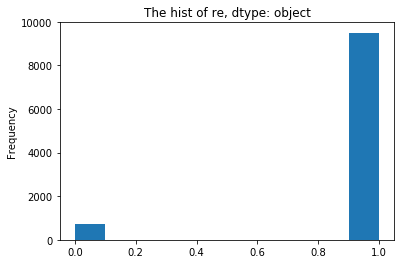

违约客户数量： 728 占总数据百分比： 7.115 % 
不违约客户数量： 9504 占总数据百分比： 92.885 %


In [14]:
data_ad['re'].astype(int).plot.hist()
plt.title("The hist of {}, dtype: {}".format('re', data_ad['re'].dtype))
plt.show()

print ('违约客户数量：', sum(data_ad['re'] == 0), "占总数据百分比：", 
       round(sum(data_ad['re'] == 0) / len(data_ad) * 100, 3), "%",
      '\n不违约客户数量：', sum(data_ad['re'] == 1), "占总数据百分比：", 
       round(sum(data_ad['re'] == 1) / len(data_ad) * 100, 3), "%",
      )

数据中存在不违约客户过度表达现象， 需要用某种方式平衡数据中不同目标变量的数据。

The target feature is imbalanced as more than 90% of customers are non-default.

Methods should be applied to deal with the imbalanced distribution of target label.

# 将数据按变量类型拆分分开分析



X_cat 指所有分类变量， X_cont 指所有连续变量

X_cat - All the categorical features
X_cont - All the continuous features

In [15]:
# import sklearn

# from sklearn.decomposition import PCA

Y = data_ad['re']
X = data_ad.loc[:, data_ad.columns != 're']
X_cat = []
X_cont = []
for col in X:
    if X[col].dtype == 'object':
        X_cat.append(col)
    else:
        X_cont.append(col)
X_cat = X[X_cat]
X_cont = X[X_cont]

# 变量类型转换 Label encode/One-hot encode categorical data

In [16]:
le = LabelEncoder()
count = 0  
# Label encode categorical varaibles with less than 3 values
for col in X_cat:
    if len(list(X_cat[col].unique())) <=2:
        le.fit(X_cat[col])
        X_cat[col] = le.transform(X_cat[col])
#            data[col] = le.transform(data[col])
        count = count + 1
#    else:
#        X[col] = pd.get_dummies(X[col])
print("%d 列特征是label编码"%count)


# One-hot encode variables
# Change nominal variables contain more than 2 values to dummy variables
X_cat = pd.get_dummies(X_cat)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


3 列特征是label编码


将分类变量转换为哑变量

Change categorical variables to dummy variables

In [17]:
Y = Y.astype(int)

In [18]:
# 将目标变量添加回各表

X_cat = pd.concat([X_cat, Y], axis=1, join='inner')
X_cont = pd.concat([X_cont, Y], axis=1, join='inner')

In [19]:
# 转换目标变量

le.fit(X_cat['re'])
X_cat['re'] = le.transform(X_cat['re'])

le.fit(X_cont['re'])
X_cont['re'] = le.transform(X_cont['re'])

# 找到和目标变量关联性强的变量并观察共线性

Identify the variables with highest/lowest correlation with the target variable

## 分类变量

In [20]:
# df[['Income', 'Education', 'LoanAmount']].corr()['LoanAmount'][:]

corr_sort_cat = X_cat.corr()['re'][:].sort_values()
# Looking for the 10 most positive/negative correlation with the target variable
print('Ten features with the highest corr：\n',corr_sort_cat.tail(11))
print('Ten features with the lowest corr：\n',corr_sort_cat.head(10))

Ten features with the highest corr：
 x007_3    0.029513
x010_2    0.033724
x009_3    0.046497
x008_4    0.050196
x001      0.058167
x006_8    0.060222
x003_2    0.066866
x045      0.067385
x016_2    0.074159
x044      0.116078
re        1.000000
Name: re, dtype: float64
Ten features with the lowest corr：
 x003_1   -0.078356
x016_3   -0.067385
x010_1   -0.038547
x006_2   -0.035721
x007_2   -0.030653
x006_9   -0.028753
x008_2   -0.028085
x009_2   -0.027785
x005_6   -0.024073
x005_2   -0.019717
Name: re, dtype: float64


筛选出相关性较高的（正相关性最高的五个和负相关性最高的五个）十个变量进一步分析

Filter the variables of the 5 highest correlations and of those of the 5 lowest correlations

In [21]:
coltail = corr_sort_cat.tail(6).index.tolist()
colhead = corr_sort_cat.head(5).index.tolist()
cat_col = coltail + colhead
#cat_col -= cat_col['re']   

In [22]:
corr_mat = X_cat[cat_col].corr()
print (corr_mat)

          x006_8    x003_2      x045    x016_2      x044        re    x003_1  \
x006_8  1.000000 -0.149743  0.149778  0.145650 -0.013873  0.060222  0.122578   
x003_2 -0.149743  1.000000  0.029095  0.048198  0.055578  0.066866 -0.909585   
x045    0.149778  0.029095  1.000000  0.945387  0.025862  0.067385 -0.062584   
x016_2  0.145650  0.048198  0.945387  1.000000  0.033633  0.074159 -0.083295   
x044   -0.013873  0.055578  0.025862  0.033633  1.000000  0.116078 -0.057128   
re      0.060222  0.066866  0.067385  0.074159  0.116078  1.000000 -0.078356   
x003_1  0.122578 -0.909585 -0.062584 -0.083295 -0.057128 -0.078356  1.000000   
x016_3 -0.149778 -0.029095 -1.000000 -0.945387 -0.025862 -0.067385  0.062584   
x010_1 -0.037351 -0.144250 -0.088857 -0.099768  0.010025 -0.038547  0.150308   
x006_2 -0.004706  0.007139 -0.005156 -0.004875 -0.005201 -0.035721 -0.006494   
x007_2 -0.163075  0.030339 -0.085493 -0.087183 -0.014454 -0.030653 -0.032544   

          x016_3    x010_1    x006_2   

生成关联矩阵

Text(0.5, 1.0, 'Correlation Heatmap')

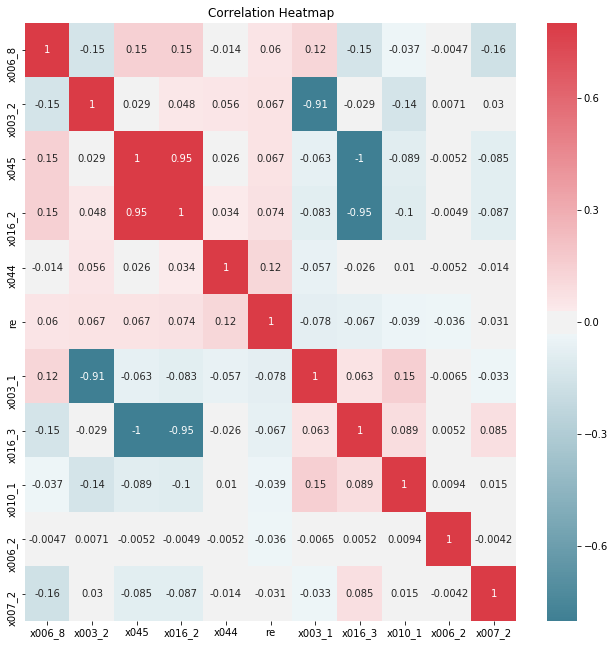

In [23]:
plt.figure(figsize = (11,11))
sns.heatmap(corr_mat, cmap = sns.diverging_palette(220, 10, as_cmap=True), vmin = -0.8, annot = True, vmax = 0.8)
plt.title('Correlation Heatmap')

根据关联矩阵，变量x016_2-x045, x003_2-x003_1, x045-x016_3,x016_2-x016_3之间共线，

因此我们筛去变量x016_2,x016_3,x003_2三个变量

We filterd the variables x016_2,x016_3,x003_2 for their collinearity

In [24]:
cat_col = list(set(cat_col) - set(['x016_2', 'x016_3', 'x003_2']))

## 连续变量

In [25]:
corr_sort_cont = X_cont.corr()['re'][:].sort_values()
# Looking for the 10 most positive/negative correlation with the target variable
print('Ten features with the highest corr：\n',corr_sort_cont.tail(11))
print('Ten features with the lowest corr：\n',corr_sort_cont.head(10))

Ten features with the highest corr：
 x031    0.033796
x027    0.036114
x026    0.037485
x018    0.037772
x013    0.042060
x011    0.051924
x014    0.051987
x015    0.052440
x002    0.096968
x029    0.169125
re      1.000000
Name: re, dtype: float64
Ten features with the lowest corr：
 x041   -0.385241
x040   -0.267291
x033   -0.199282
x032   -0.164646
x021   -0.164218
x035   -0.163805
x020   -0.121111
x022   -0.112357
x034   -0.091406
x037   -0.071082
Name: re, dtype: float64


筛选出相关性较高的（正相关性最高的五个和负相关性最高的九个）十四个变量进一步分析

We filtered 14 variables with higher correlations to analyze.

In [26]:
contcoltail = corr_sort_cont.tail(6).index.tolist()
contcolhead = corr_sort_cont.head(9).index.tolist()
cont_col = contcoltail + contcolhead
#cat_col -= cat_col['re']   

In [27]:
cont_corr_mat = X_cont[cont_col].corr()
print (cont_corr_mat)

          x011      x014      x015      x002      x029        re      x041  \
x011  1.000000  0.999177  0.853147  0.228083  0.143642  0.051924 -0.114927   
x014  0.999177  1.000000  0.853918  0.228483  0.144021  0.051987 -0.114699   
x015  0.853147  0.853918  1.000000  0.206967  0.130601  0.052440 -0.110345   
x002  0.228083  0.228483  0.206967  1.000000  0.148036  0.096968 -0.157560   
x029  0.143642  0.144021  0.130601  0.148036  1.000000  0.169125 -0.321968   
re    0.051924  0.051987  0.052440  0.096968  0.169125  1.000000 -0.385241   
x041 -0.114927 -0.114699 -0.110345 -0.157560 -0.321968 -0.385241  1.000000   
x040 -0.068643 -0.067487 -0.083366 -0.177154 -0.090082 -0.267291  0.551650   
x033 -0.065008 -0.065272 -0.070338 -0.104919 -0.525686 -0.199282  0.448291   
x032 -0.008464 -0.008647 -0.026164 -0.019160 -0.486712 -0.164646  0.400954   
x021 -0.053689 -0.053857 -0.056733 -0.066915 -0.380157 -0.164218  0.490109   
x035 -0.125420 -0.125731 -0.113938 -0.069812 -0.826321 -0.163805

Text(0.5, 1.0, 'Correlation Heatmap')

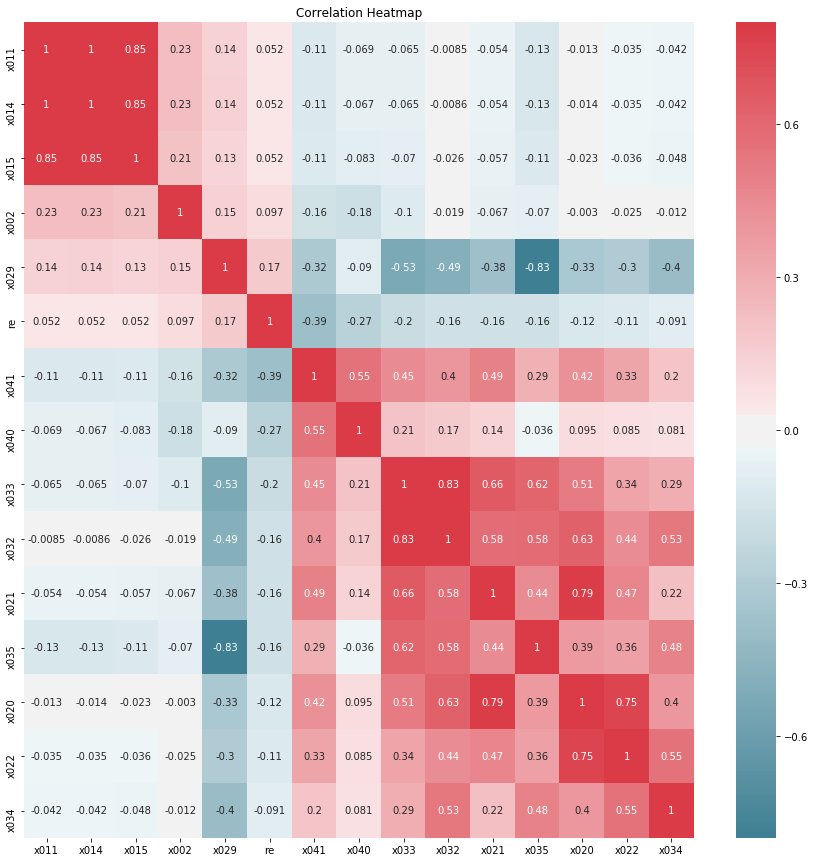

In [28]:
plt.figure(figsize = (15,15))
sns.heatmap(cont_corr_mat, cmap = sns.diverging_palette(220, 10, as_cmap=True), vmin = -0.8, annot = True, vmax = 0.8)
plt.title('Correlation Heatmap')

根据关联矩阵，变量x014-x011, x015-x011, x015-x014, x035-x029, x032-x033之间共线，

因此我们筛去变量x014,x015,x035,x032四个变量

Filter the variables x014,x015,x035,x032 because of collinearity

In [29]:
cont_col = list(set(cont_col) - set(['x014', 'x015', 'x035', 'x032']))

In [30]:
X_cont = X_cont[cont_col]
X_cont = X_cont.loc[:, X_cont.columns != 're']
X_cont.columns

Index(['x040', 'x022', 'x011', 'x029', 'x034', 'x021', 'x002', 'x033', 'x041',
       'x020'],
      dtype='object')

In [31]:
poly = PolynomialFeatures(2)
X_contpol = poly.fit_transform(X_cont)

X_contpol.shape

(10232, 66)

In [32]:
X_contpol_df = pd.DataFrame(data = X_contpol,    # values
              index=list(range(len(X_cont))),    # 1st column as index
              columns = poly.get_feature_names())
X_contpol = pd.concat([X_contpol_df, Y], axis=1, join='inner')

In [33]:
corr_sort_contpol = X_contpol.corr()['re'][:].sort_values()
# Looking for the 10 most positive/negative correlation with the target variable
print('Ten features with the highest corr：\n',corr_sort_contpol.tail(11))
print('Ten features with the lowest corr：\n',corr_sort_contpol.head(20))

Ten features with the highest corr：
 x2^2     0.025294
x2       0.051924
x2 x6    0.060080
x2 x3    0.086507
x6^2     0.087167
x6       0.096968
x3 x6    0.150683
x3       0.169125
x3^2     0.185708
re       1.000000
1             NaN
Name: re, dtype: float64
Ten features with the lowest corr：
 x0 x8   -0.388112
x8      -0.385241
x8^2    -0.309977
x3 x8   -0.282276
x4 x8   -0.282077
x0^2    -0.270234
x0      -0.267291
x6 x8   -0.266843
x0 x7   -0.261444
x2 x8   -0.255960
x7 x8   -0.247332
x0 x4   -0.227517
x7      -0.199282
x1 x8   -0.197263
x0 x5   -0.192709
x0 x1   -0.181979
x3 x7   -0.168223
x4 x7   -0.164699
x5      -0.164218
x5 x8   -0.158496
Name: re, dtype: float64


多项式特征中并没有与目标变量强相关对变量。

构造多项式特征对模型预测能力的帮助并不显著。

Fail to identify any polynomial features can improve the model significantly.

In [34]:
contcoltailpol = corr_sort_contpol.tail(11).index.tolist()
contcolheadpol = corr_sort_contpol.head(20).index.tolist()
cont_colpol = contcoltailpol + contcolheadpol
#cat_col -= cat_col['re'] 

In [35]:
cont_colpol = list(set(cont_colpol) - set(['1'])) # 筛去常量项

In [36]:
contpol_corr_mat = X_contpol[cont_colpol].corr()
print (contpol_corr_mat)

          x4 x7        x7     x7 x8     x3 x6     x3 x7        x0        x2  \
x4 x7  1.000000  0.829432  0.631978 -0.314600  0.557681  0.170141 -0.008489   
x7     0.829432  1.000000  0.727322 -0.365723  0.725773  0.206177 -0.065008   
x7 x8  0.631978  0.727322  1.000000 -0.223669  0.504020  0.260334 -0.057142   
x3 x6 -0.314600 -0.365723 -0.223669  1.000000 -0.204391 -0.163008  0.249150   
x3 x7  0.557681  0.725773  0.504020 -0.204391  1.000000  0.314263 -0.053332   
x0     0.170141  0.206177  0.260334 -0.163008  0.314263  1.000000 -0.068643   
x2    -0.008489 -0.065008 -0.057142  0.249150 -0.053332 -0.068643  1.000000   
x3^2  -0.502158 -0.552409 -0.333377  0.678983 -0.334548 -0.156196  0.158421   
x6    -0.019168 -0.104919 -0.088131  0.767003 -0.121209 -0.177154  0.228083   
x3 x8  0.142812  0.175414  0.319685 -0.095701  0.356800  0.631244 -0.084576   
x8^2   0.294679  0.313066  0.587278 -0.180959  0.239424  0.327851 -0.071671   
x0 x4  0.506337  0.376652  0.348610 -0.195359  0.456

Text(0.5, 1.0, 'Correlation Heatmap')

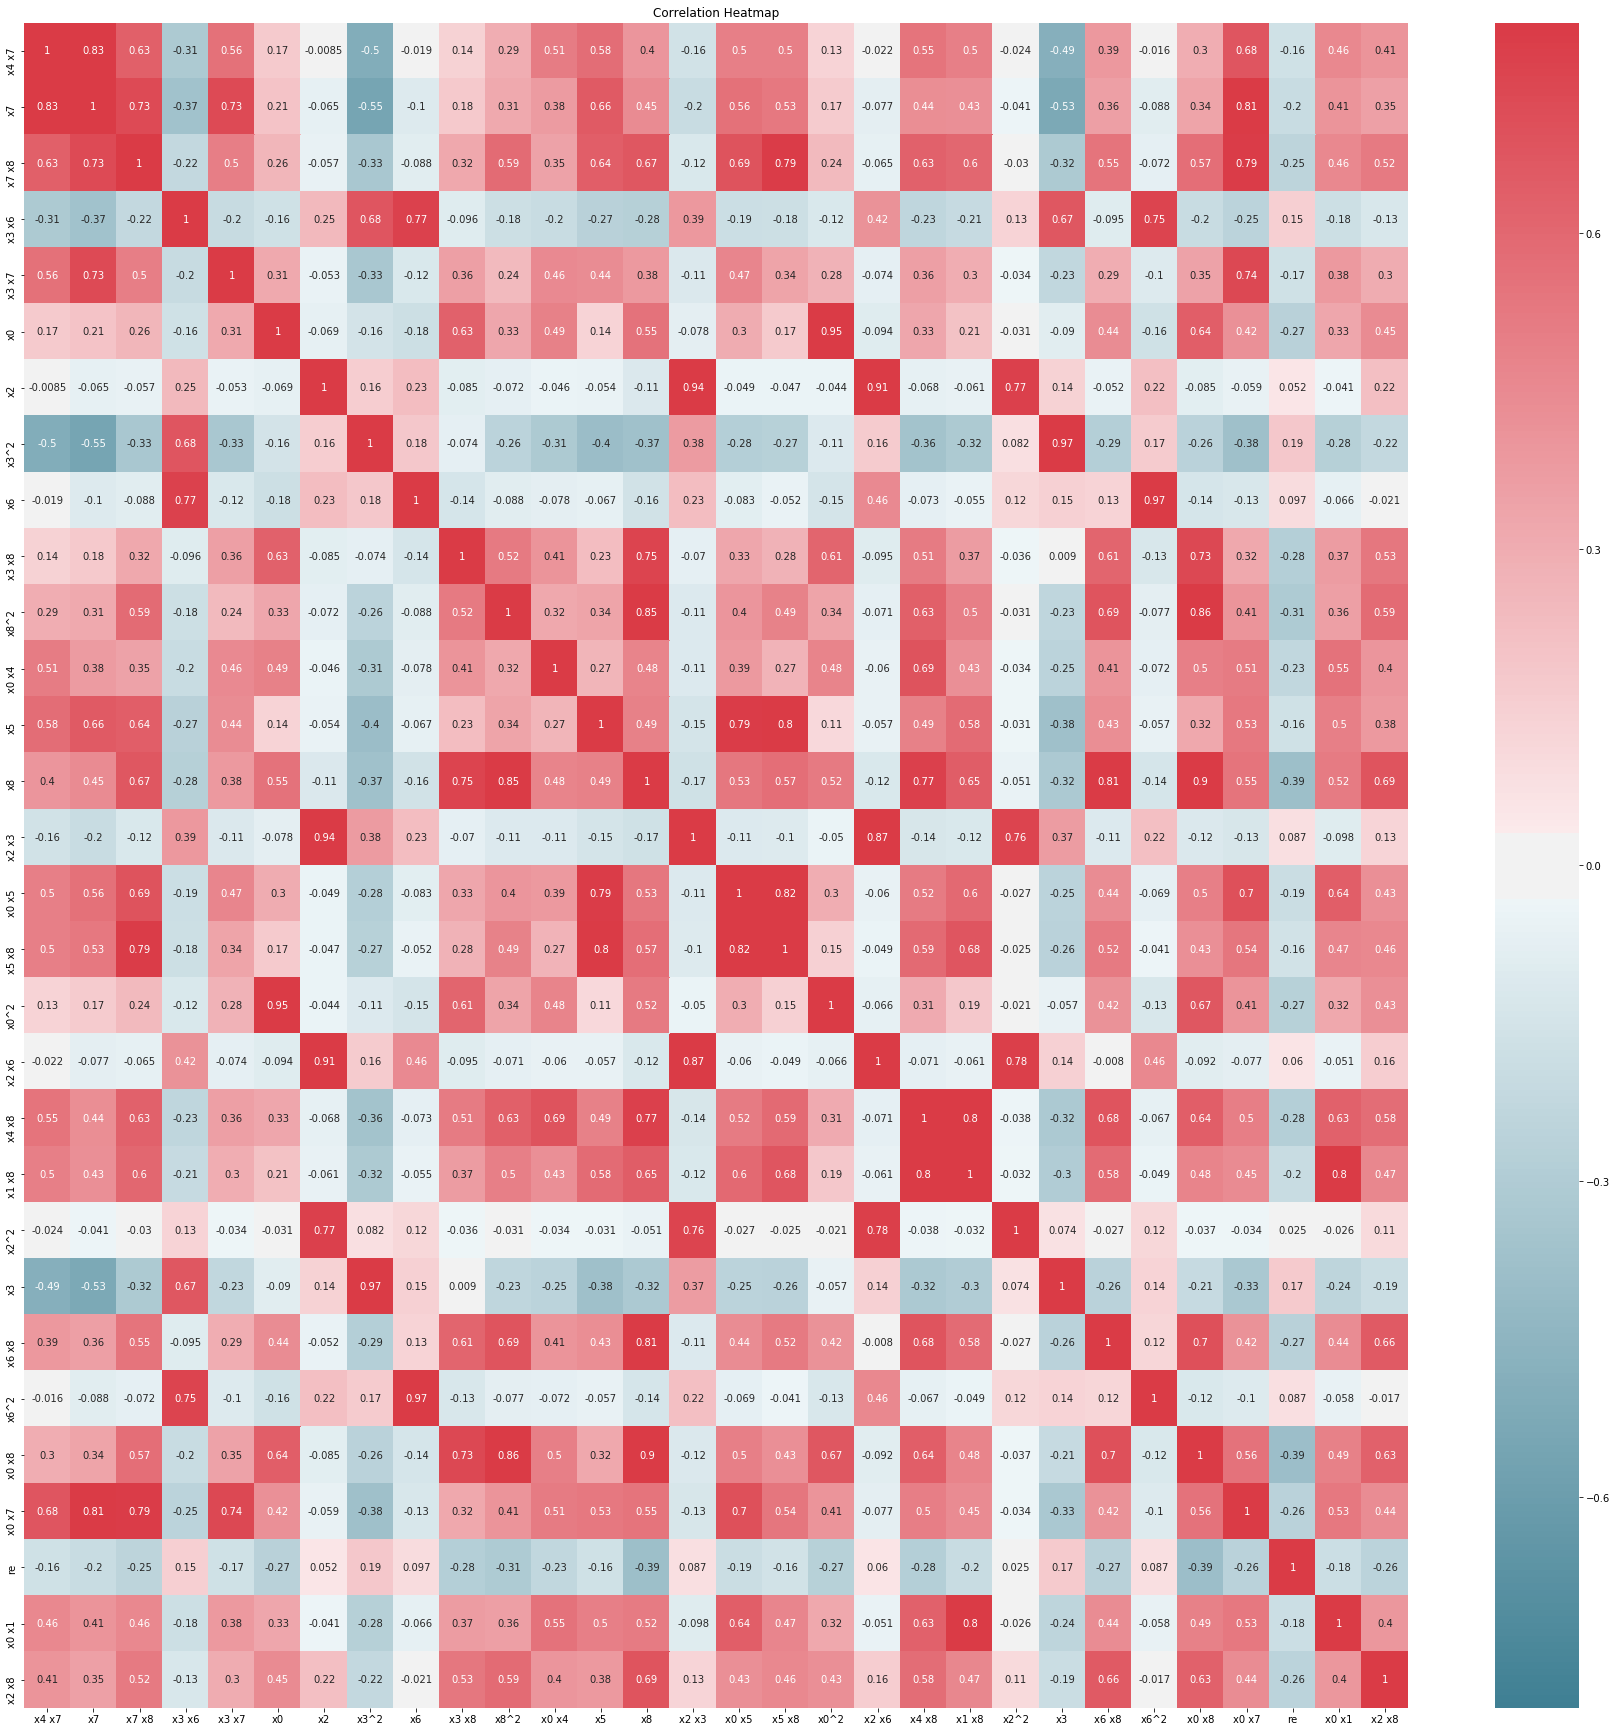

In [37]:
plt.figure(figsize = (31,31))
sns.heatmap(contpol_corr_mat, cmap = sns.diverging_palette(220, 10, as_cmap=True), vmin = -0.8, annot = True, vmax = 0.8)
plt.title('Correlation Heatmap')

去掉变量 'x2 x5', 'x2^2', 'x0 x3', 'x0', 'x2 x7', 'x1 x5', 'x2 x8', 'x5', 'x2 x4', 'x3', 'x4^2'

Remove features 'x2 x5', 'x2^2', 'x0 x3', 'x0', 'x2 x7', 'x1 x5', 'x2 x8', 'x5', 'x2 x4', 'x3', 'x4^2'

In [38]:
cont_colpol = list(set(cont_colpol) - set(['x2 x5', 'x2^2', 'x0 x3', 'x0', 'x2 x7', 
                                           'x1 x5', 'x2 x8', 'x5', 'x2 x4', 'x3', 'x4^2']))

In [39]:
print ("polynomial continuous features: {}".format(cont_colpol))
print ("Continuous features: {}".format(cont_col))
print ("Categorical features: {}".format(cat_col))

polynomial continuous features: ['x4 x7', 'x7 x8', 'x3^2', 'x6', 'x3 x8', 'x8^2', 'x0 x4', 'x5 x8', 'x0^2', 'x2 x6', 'x4 x8', 'x6 x8', 'x6^2', 're', 'x0 x1', 'x7', 'x3 x6', 'x3 x7', 'x2', 'x8', 'x0 x5', 'x2 x3', 'x1 x8', 'x0 x8', 'x0 x7']
Continuous features: ['x040', 'x022', 'x011', 'x029', 'x034', 'x021', 'x002', 'x033', 're', 'x041', 'x020']
Categorical features: ['x003_1', 'x044', 'x006_8', 'x007_2', 'x045', 'x010_1', 're', 'x006_2']


In [40]:
result_df = pd.concat([X_contpol[cont_colpol], X_cat[cat_col]], axis=1)
df_col = result_df.columns.tolist()
df_col.remove('re')
df_col.remove('re')
result_df = result_df[df_col]

#remove = remove_dup.tolist()
#remove.remove('re')
#remove.remove('re')

#remove_dup.remove('re')
#for i in result_df.columns:
#    if i not in remove_dup:
#        remove_dup.append(i)
#result_df = result_df[remove_dup]

Check multicolinearity Using Variance Inflation Factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_unvar = add_constant(result_df)
vif_var = pd.Series([variance_inflation_factor(X_unvar.values, i) 
               for i in range(X_unvar.shape[1])], 
              index=X_unvar.columns)
vif_var

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const     60.538769
x4 x7      4.981711
x7 x8      8.998004
x3^2       5.776599
x6        32.147585
x3 x8      5.281329
x8^2      11.635816
x0 x4      4.198846
x5 x8      9.216478
x0^2       3.746928
x2 x6     11.067773
x4 x8      8.796862
x6 x8      4.366894
x6^2      23.217556
x0 x1      6.161388
x7         8.682372
x3 x6     11.485623
x3 x7      3.660245
x2        24.658304
x8        22.547739
x0 x5      7.475524
x2 x3     21.458041
x1 x8      9.600691
x0 x8     22.964879
x0 x7      9.858163
x003_1     2.047632
x044       1.027853
x006_8     1.101474
x007_2     1.038315
x045       1.081138
x010_1     1.216730
x006_2     1.001130
dtype: float64

筛选出VIF > 2.5的变量

The threshold of VIF is chosed as 2.5

In [42]:
# Remove about 5 
remove_var5 = vif_var[vif_var > 5].index.tolist()
# remove_var = ['const']
X1_col = list(set(X_unvar.columns) - set(remove_var5))
X1 = X_unvar[X1_col]

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC

import statsmodels.api as sm

def evaluate(actuals, predictions):
    acc = accuracy_score(actuals, predictions)
    f1 = f1_score(actuals, predictions,  average='macro')  
    auc = roc_auc_score(actuals, predictions)
    print ("Overall classification accuracy:{}%\nf1-score:{}\nAUC value:{}".format(round(acc * 100, 4), round(f1, 4),
                                                                                  round(auc, 4)))
    con_mat = confusion_matrix(actuals, predictions)
    print (con_mat)
    
    mat = pd.DataFrame(data = con_mat,
                  index = ['Default', 'Non-default'],
                  columns = ['Default', 'Non-default'])
    print (mat,'\n')
    
def RandomForest(X_tr, y_tr, X_te, y_te, tree_n, cw = None):
    clf = RandomForestClassifier(n_estimators=tree_n, max_depth=2, random_state=0, class_weight = cw)
    clf.fit(X_tr, y_tr)
    clf_pred = clf.predict(X_te)
    clf_prob = clf.predict_proba(X_te)
    
    text = "=================================="
    print ("{}\nThe result of Random Forest model:".format(text))
    evaluate(y_te, clf_pred)    
    return clf_pred, clf_prob
 

def LogisticRegression(X_tr, y_tr, X_te, y_te, cw = None):
    clf_CV = LogisticRegressionCV(cv=10, random_state=0, solver = 'liblinear', class_weight = cw) # Model Setting
    clf_CV.fit(X_tr, y_tr) # Model Fitting
    clf_cv_pred = clf_CV.predict(X_te)
    clf_cv_prob = clf_CV.predict_proba(X_te)
   
    
    text = "=================================="
    print ("{}\nThe result of Logistic Regression model:".format(text))
    evaluate(y_te, clf_cv_pred)
    
    
    X_tr_2 = sm.add_constant(X_tr)
    est = sm.OLS(y_tr, X_tr_2)
    est2 = est.fit()
    print(est2.summary())
    
    return clf_cv_pred, clf_cv_prob
    

def xgboost(X_tr, y_tr, X_te, y_te):
    model = XGBClassifier()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)
    
    
    text = "=================================="
    print ("{}\nThe result of XGBoost model:".format(text))
    evaluate(y_te, y_pred)
    
    return y_pred, y_prob

def svc(X_tr, y_tr, X_te, y_te, cw = None):
    model = SVC(gamma='auto', class_weight = cw, probability = True)
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)
    
    text = "=================================="
    print ("{}\nThe result of Support Machine Classifier model:".format(text))
    evaluate(y_te, y_pred)
    return y_pred, y_prob

def ensemble(X_tr, y_tr, X_te, y_te, n_trees,w, cw = None):
    
    model1 = LogisticRegressionCV(cv=10, random_state=0, solver = 'liblinear', class_weight = cw)
    model2 = RandomForestClassifier(n_estimators=n_trees, max_depth=2, random_state=0, class_weight = cw)
    model3 = XGBClassifier()
    model4 = SVC(gamma = 'auto', class_weight = cw, probability = True)
    
    ensclf = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('xgb', model3), ('svc', model4)]
                              ,voting = 'soft',weights=w)
    ensclf = ensclf.fit(X_tr, y_tr)
    
    pred = ensclf.predict(X_te)
    prob = ensclf.predict_proba(X_te)
    
    
    text = "=================================="
    print ("{}\nThe result of Ensemble model:".format(text))
    evaluate(y_te, pred)
    
    return pred, prob
    

def ROC_plot(model, actual):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    clf = ['LR', 'RF', 'XGB', 'SVC', 'Es']
    
    labels = ["Logistic Regression", "Random Forest", "XGBoost", "SVC", "Ensemble model"]
    
    colours = ["deeppink", "yellow", "darkorange", "blue", "red"]
    
    plt.figure()
    
    for i in range(0, len(clf)):
         # Compute logistic regression ROC curve and ROC area
    
            
        fpr[clf[i]], tpr[clf[i]], _ = roc_curve(actual, model[i][:,1])

        roc_auc[clf[i]] = auc(fpr[clf[i]], tpr[clf[i]])

    
    
        plt.plot(fpr[clf[i]], tpr[clf[i]],
         label='{} ROC curve (area = {})'
               ''.format(labels[i], round(roc_auc[clf[i]], 2)),
         color=colours[i], linewidth=2)
        
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

    
def modeling(data, target, tree_n = 50, weights=[1,1,1,1]):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42) # Data partition
    
    smt = SMOTETomek(ratio='auto')
    X_smt, y_smt = smt.fit_sample(X_train, y_train)
    # Oversampeling & Undersampling the data
    X_smt_df = pd.DataFrame(data = X_smt,    # values
              index=list(range(len(X_smt))),    # 1st column as index
              columns = X_train.columns)

#    print (X_smt_df.shape, y_smt.shape, X_test.shape, y_test.shape)

    lrpred, lrprob = LogisticRegression(X_smt_df, y_smt, X_test, y_test)
    rfpred, rfprob = RandomForest(X_smt_df, y_smt, X_test, y_test, tree_n)
    xgbpred, xgbprob = xgboost(X_smt_df, y_smt, X_test, y_test)
    svcpred, svcprob = svc(X_smt_df, y_smt, X_test, y_test)
    ens, ensprob = ensemble(X_smt_df, y_smt, X_test, y_test, tree_n, weights)
    clfmodel = [lrprob, rfprob, xgbprob, svcprob, ensprob]

    ROC_plot(clfmodel, y_test)



The result of Logistic Regression model:
Overall classification accuracy:78.6497%
f1-score:0.5981
AUC value:0.7375
[[ 172   81]
 [ 640 2484]]
             Default  Non-default
Default          172           81
Non-default      640         2484 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     523.2
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:01:09   Log-Likelihood:                -6431.5
No. Observations:               12362   AIC:                         1.289e+04
Df Residuals:                   12349   BIC:                         1.299e+04
Df Model:                          12                                         
Covariance Type:            nonrobust      

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:74.4152%
f1-score:0.5634
AUC value:0.711
[[ 170   83]
 [ 781 2343]]
             Default  Non-default
Default          170           83
Non-default      781         2343 

The result of XGBoost model:
Overall classification accuracy:78.9754%
f1-score:0.607
AUC value:0.7574
[[ 182   71]
 [ 639 2485]]
             Default  Non-default
Default          182           71
Non-default      639         2485 

The result of Support Machine Classifier model:
Overall classification accuracy:80.1007%
f1-score:0.5996
AUC value:0.7145
[[ 155   98]
 [ 574 2550]]
             Default  Non-default
Default          155           98
Non-default      574         2550 

The result of Ensemble model:
Overall classification accuracy:78.6201%
f1-score:0.6027
AUC value:0.7519
[[ 180   73]
 [ 649 2475]]
             Default  Non-default
Default          180           73
Non-default      649         2475 



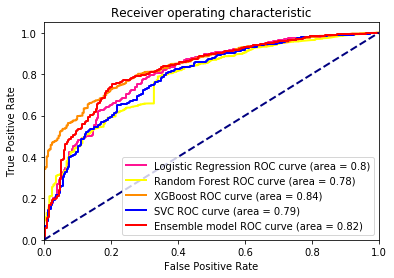

In [44]:
tree_number = 100
modeling(X1, Y, tree_number)

In [45]:
# Remove about 10 
remove_var10 = vif_var[vif_var > 10].index.tolist()
# remove_var = ['const']
X2_col = list(set(X_unvar.columns) - set(remove_var10))
X2 = X_unvar[X2_col]

In [46]:
X2.columns

Index(['x4 x7', 'x003_1', 'x7 x8', 'x044', 'x3^2', 'x006_8', 'x3 x8', 'x0 x4',
       'x5 x8', 'x0^2', 'x4 x8', 'x6 x8', 'x0 x1', 'x7', 'x3 x7', 'x045',
       'x010_1', 'x0 x5', 'x1 x8', 'x007_2', 'x0 x7', 'x006_2'],
      dtype='object')

The result of Logistic Regression model:
Overall classification accuracy:75.6589%
f1-score:0.578
AUC value:0.734
[[ 179   74]
 [ 748 2376]]
             Default  Non-default
Default          179           74
Non-default      748         2376 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     375.0
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:02:43   Log-Likelihood:                -5883.8
No. Observations:               12476   AIC:                         1.181e+04
Df Residuals:                   12453   BIC:                         1.198e+04
Df Model:                          22                                         
Covariance Type:            nonrobust        

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:74.4744%
f1-score:0.5638
AUC value:0.7113
[[ 170   83]
 [ 779 2345]]
             Default  Non-default
Default          170           83
Non-default      779         2345 

The result of XGBoost model:
Overall classification accuracy:81.1667%
f1-score:0.6165
AUC value:0.7402
[[ 166   87]
 [ 549 2575]]
             Default  Non-default
Default          166           87
Non-default      549         2575 

The result of Support Machine Classifier model:
Overall classification accuracy:70.5064%
f1-score:0.544
AUC value:0.7207
[[ 187   66]
 [ 930 2194]]
             Default  Non-default
Default          187           66
Non-default      930         2194 

The result of Ensemble model:
Overall classification accuracy:80.1007%
f1-score:0.6139
AUC value:0.7544
[[ 177   76]
 [ 596 2528]]
             Default  Non-default
Default          177           76
Non-default      596         2528 



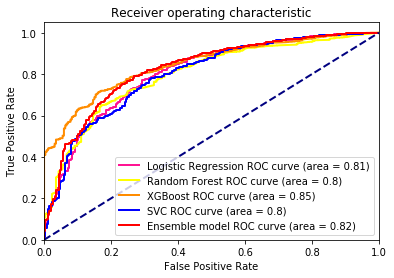

In [47]:
modeling(X2, Y, tree_number)

In [48]:
# Remove above 2.5
remove_var25 = vif_var[vif_var > 2.5].index.tolist()
# remove_var = ['const']
X3_col = list(set(X_unvar.columns) - set(remove_var25))
X3 = X_unvar[X3_col]

The result of Logistic Regression model:
Overall classification accuracy:49.541%
f1-score:0.4112
AUC value:0.6274
[[ 198   55]
 [1649 1475]]
             Default  Non-default
Default          198           55
Non-default     1649         1475 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     361.0
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:41:19   Log-Likelihood:                -8107.6
No. Observations:               12760   AIC:                         1.623e+04
Df Residuals:                   12752   BIC:                         1.629e+04
Df Model:                           7                                         
Covariance Type:            nonrobust       

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:49.5706%
f1-score:0.4111
AUC value:0.6257
[[ 197   56]
 [1647 1477]]
             Default  Non-default
Default          197           56
Non-default     1647         1477 

The result of XGBoost model:
Overall classification accuracy:45.4249%
f1-score:0.3865
AUC value:0.6197
[[ 206   47]
 [1796 1328]]
             Default  Non-default
Default          206           47
Non-default     1796         1328 

The result of Support Machine Classifier model:
Overall classification accuracy:45.3065%
f1-score:0.3863
AUC value:0.6227
[[ 208   45]
 [1802 1322]]
             Default  Non-default
Default          208           45
Non-default     1802         1322 

The result of Ensemble model:
Overall classification accuracy:47.1128%
f1-score:0.3963
AUC value:0.6197
[[ 201   52]
 [1734 1390]]
             Default  Non-default
Default          201           52
Non-default     1734         1390 



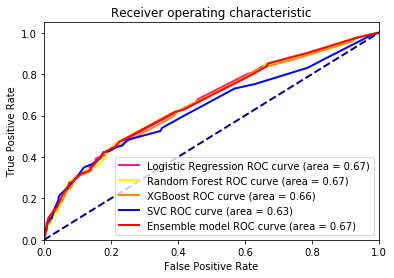

In [49]:
tree_number = 200

modeling(X3, Y, tree_number)

In [50]:
result_df2 = pd.concat([X_cont, X_cat[cat_col]], axis=1)
df_col2 = result_df2.columns.tolist()
df_col2.remove('re')
result_df2 = result_df2[df_col2]

X_unvar2 = add_constant(result_df2)
vif_var2 = pd.Series([variance_inflation_factor(X_unvar2.values, i) 
               for i in range(X_unvar2.shape[1])], 
              index=X_unvar2.columns)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
vif_var2

const     24.586880
x040       1.543989
x022       3.018922
x011       1.233755
x029       1.624659
x034       1.651600
x021       4.107885
x002       1.765405
x033       2.206328
x041       2.044352
x020       5.326983
x003_1     1.699221
x044       1.021052
x006_8     1.096517
x007_2     1.036832
x045       1.076192
x010_1     1.170939
x006_2     1.000944
dtype: float64

In [52]:
# Remove about 2.5 The best model 
remove_var25_2 = vif_var2[vif_var2 > 2.5].index.tolist()
# remove_var = ['const']
X4_col = list(set(X_unvar2.columns) - set(remove_var25_2))
X4 = X_unvar2[X4_col]

In [53]:
X4_col

['x040',
 'x003_1',
 'x044',
 'x011',
 'x029',
 'x006_8',
 'x034',
 'x007_2',
 'x045',
 'x010_1',
 'x002',
 'x033',
 'x006_2',
 'x041']

The result of Logistic Regression model:
Overall classification accuracy:79.3604%
f1-score:0.6055
AUC value:0.745
[[ 174   79]
 [ 618 2506]]
             Default  Non-default
Default          174           79
Non-default      618         2506 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     590.6
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:43:08   Log-Likelihood:                -5954.1
No. Observations:               12586   AIC:                         1.194e+04
Df Residuals:                   12571   BIC:                         1.205e+04
Df Model:                          14                                         
Covariance Type:            nonrobust       

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:73.5268%
f1-score:0.5562
AUC value:0.7044
[[ 169   84]
 [ 810 2314]]
             Default  Non-default
Default          169           84
Non-default      810         2314 

The result of XGBoost model:
Overall classification accuracy:83.3284%
f1-score:0.6333
AUC value:0.741
[[ 160   93]
 [ 470 2654]]
             Default  Non-default
Default          160           93
Non-default      470         2654 

The result of Support Machine Classifier model:
Overall classification accuracy:74.6521%
f1-score:0.5746
AUC value:0.7431
[[ 187   66]
 [ 790 2334]]
             Default  Non-default
Default          187           66
Non-default      790         2334 

The result of Ensemble model:
Overall classification accuracy:81.7886%
f1-score:0.6295
AUC value:0.7635
[[ 177   76]
 [ 539 2585]]
             Default  Non-default
Default          177           76
Non-default      539         2585 



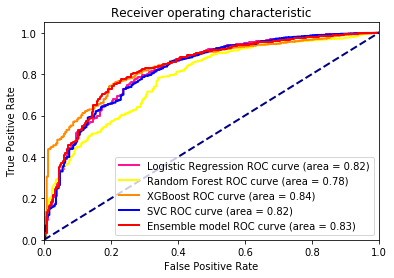

In [54]:
w = [1, 1, 1.5, 1]
tree_number = 50

modeling(X4, Y, tree_number, w)

Tree Number:50
The result of Logistic Regression model:
Overall classification accuracy:79.5973%
f1-score:0.6075
AUC value:0.7462
[[ 174   79]
 [ 610 2514]]
             Default  Non-default
Default          174           79
Non-default      610         2514 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     600.1
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:44:44   Log-Likelihood:                -5927.5
No. Observations:               12606   AIC:                         1.188e+04
Df Residuals:                   12591   BIC:                         1.200e+04
Df Model:                          14                                         
Covariance Type:            

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:73.5268%
f1-score:0.5562
AUC value:0.7044
[[ 169   84]
 [ 810 2314]]
             Default  Non-default
Default          169           84
Non-default      810         2314 

The result of XGBoost model:
Overall classification accuracy:83.6837%
f1-score:0.6369
AUC value:0.7429
[[ 160   93]
 [ 458 2666]]
             Default  Non-default
Default          160           93
Non-default      458         2666 

The result of Support Machine Classifier model:
Overall classification accuracy:75.0074%
f1-score:0.5768
AUC value:0.7432
[[ 186   67]
 [ 777 2347]]
             Default  Non-default
Default          186           67
Non-default      777         2347 

The result of Ensemble model:
Overall classification accuracy:81.6405%
f1-score:0.6249
AUC value:0.7537
[[ 172   81]
 [ 539 2585]]
             Default  Non-default
Default          172           81
Non-default      539         2585 



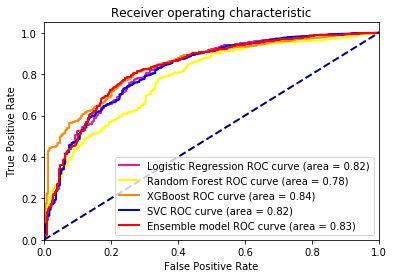

Tree Number:100
The result of Logistic Regression model:
Overall classification accuracy:79.2123%
f1-score:0.6029
AUC value:0.7405
[[ 172   81]
 [ 621 2503]]
             Default  Non-default
Default          172           81
Non-default      621         2503 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     608.8
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:46:24   Log-Likelihood:                -5900.1
No. Observations:               12620   AIC:                         1.183e+04
Df Residuals:                   12605   BIC:                         1.194e+04
Df Model:                          14                                         
Covariance Type:           

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:74.5632%
f1-score:0.5639
AUC value:0.71
[[ 169   84]
 [ 775 2349]]
             Default  Non-default
Default          169           84
Non-default      775         2349 

The result of XGBoost model:
Overall classification accuracy:83.5949%
f1-score:0.6388
AUC value:0.7497
[[ 164   89]
 [ 465 2659]]
             Default  Non-default
Default          164           89
Non-default      465         2659 

The result of Support Machine Classifier model:
Overall classification accuracy:74.2079%
f1-score:0.5701
AUC value:0.7371
[[ 185   68]
 [ 803 2321]]
             Default  Non-default
Default          185           68
Non-default      803         2321 

The result of Ensemble model:
Overall classification accuracy:81.6109%
f1-score:0.6272
AUC value:0.7608
[[ 176   77]
 [ 544 2580]]
             Default  Non-default
Default          176           77
Non-default      544         2580 



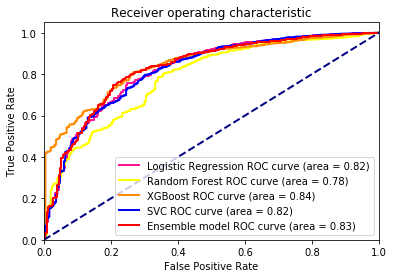

Tree Number:200
The result of Logistic Regression model:
Overall classification accuracy:79.3604%
f1-score:0.6067
AUC value:0.7486
[[ 176   77]
 [ 620 2504]]
             Default  Non-default
Default          176           77
Non-default      620         2504 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     594.3
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:47:55   Log-Likelihood:                -5947.9
No. Observations:               12600   AIC:                         1.193e+04
Df Residuals:                   12585   BIC:                         1.204e+04
Df Model:                          14                                         
Covariance Type:           

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:75.6293%
f1-score:0.572
AUC value:0.7157
[[ 169   84]
 [ 739 2385]]
             Default  Non-default
Default          169           84
Non-default      739         2385 

The result of XGBoost model:
Overall classification accuracy:83.6245%
f1-score:0.637
AUC value:0.7444
[[ 161   92]
 [ 461 2663]]
             Default  Non-default
Default          161           92
Non-default      461         2663 

The result of Support Machine Classifier model:
Overall classification accuracy:74.3855%
f1-score:0.573
AUC value:0.7435
[[ 188   65]
 [ 800 2324]]
             Default  Non-default
Default          188           65
Non-default      800         2324 

The result of Ensemble model:
Overall classification accuracy:81.4628%
f1-score:0.6264
AUC value:0.7618
[[ 177   76]
 [ 550 2574]]
             Default  Non-default
Default          177           76
Non-default      550         2574 



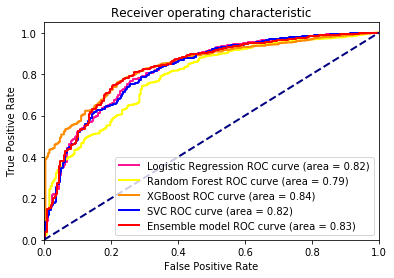

Tree Number:500
The result of Logistic Regression model:
Overall classification accuracy:79.005%
f1-score:0.6024
AUC value:0.743
[[ 174   79]
 [ 630 2494]]
             Default  Non-default
Default          174           79
Non-default      630         2494 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     605.0
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:49:30   Log-Likelihood:                -5898.9
No. Observations:               12594   AIC:                         1.183e+04
Df Residuals:                   12579   BIC:                         1.194e+04
Df Model:                          14                                         
Covariance Type:            n

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:75.7181%
f1-score:0.5756
AUC value:0.7253
[[ 174   79]
 [ 741 2383]]
             Default  Non-default
Default          174           79
Non-default      741         2383 

The result of XGBoost model:
Overall classification accuracy:83.8614%
f1-score:0.6344
AUC value:0.733
[[ 154   99]
 [ 446 2678]]
             Default  Non-default
Default          154           99
Non-default      446         2678 

The result of Support Machine Classifier model:
Overall classification accuracy:74.7113%
f1-score:0.5739
AUC value:0.7398
[[ 185   68]
 [ 786 2338]]
             Default  Non-default
Default          185           68
Non-default      786         2338 

The result of Ensemble model:
Overall classification accuracy:81.7886%
f1-score:0.6289
AUC value:0.7617
[[ 176   77]
 [ 538 2586]]
             Default  Non-default
Default          176           77
Non-default      538         2586 



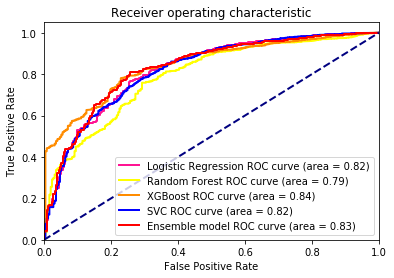

In [55]:
for tree_number in [50, 100, 200, 500]:
    print ("==========\n=========")
    print ("Tree Number:{}".format(tree_number))
    modeling(X4, Y, tree_number)
    
# The randome forest with 50, 200, 500 trees reach similar performances, we choose tree_number = 50 for further classifier building


In [56]:
# Remove about 5
remove_var5_2 = vif_var2[vif_var2 > 5].index.tolist()
# remove_var = ['const']
X5_col = list(set(X_unvar2.columns) - set(remove_var5_2))
X5 = X_unvar2[X5_col]

The result of Logistic Regression model:
Overall classification accuracy:79.1235%
f1-score:0.6052
AUC value:0.7491
[[ 177   76]
 [ 629 2495]]
             Default  Non-default
Default          177           76
Non-default      629         2495 



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     512.6
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:51:15   Log-Likelihood:                -5996.9
No. Observations:               12620   AIC:                         1.203e+04
Df Residuals:                   12603   BIC:                         1.215e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5406      0.018     30.323      0.0

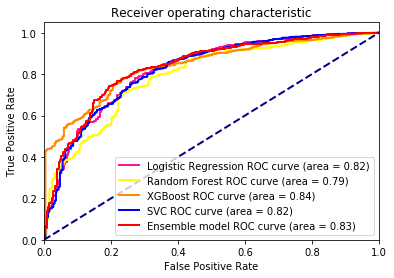

In [57]:
modeling(X5, Y, tree_number, w)

## Using different weight for each class on the data and trains new models based on the data

In [60]:
# Balanced model

def modeling2(data, target, tree_n = 50, weights=[1,1,0,1]):
    
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42) # Data partition
        
    lrpred, lrprob = LogisticRegression(X_train, y_train, X_test, y_test, 'balanced')
    rfpred, rfprob = RandomForest(X_train, y_train, X_test, y_test, tree_n, "balanced")
    xgbpred, xgbprob = xgboost(X_train, y_train, X_test, y_test)
    svcpred, svcprob = svc(X_train, y_train, X_test, y_test, 'balanced')
    ens, ensprob = ensemble(X_train, y_train, X_test, y_test, tree_n, weights, 'balanced')
    clfmodel = [lrprob, rfprob, xgbprob, svcprob, ensprob]
    ROC_plot(clfmodel, y_test)



The result of Logistic Regression model:
Overall classification accuracy:78.7385%
f1-score:0.5989
AUC value:0.738
[[ 172   81]
 [ 637 2487]]
             Default  Non-default
Default          172           81
Non-default      637         2487 

                            OLS Regression Results                            
Dep. Variable:                     re   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     86.03
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          2.49e-198
Time:                        09:18:17   Log-Likelihood:                 150.41
No. Observations:                6855   AIC:                            -274.8
Df Residuals:                    6842   BIC:                            -186.0
Df Model:                          12                                         
Covariance Type:            nonrobust       

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:73.2603%
f1-score:0.5692
AUC value:0.7538
[[ 197   56]
 [ 847 2277]]
             Default  Non-default
Default          197           56
Non-default      847         2277 

The result of XGBoost model:
Overall classification accuracy:92.6266%
f1-score:0.5377
AUC value:0.5297
[[  16  237]
 [  12 3112]]
             Default  Non-default
Default           16          237
Non-default       12         3112 

The result of Support Machine Classifier model:
Overall classification accuracy:81.9959%
f1-score:0.6088
AUC value:0.7047
[[ 144  109]
 [ 499 2625]]
             Default  Non-default
Default          144          109
Non-default      499         2625 

The result of Ensemble model:
Overall classification accuracy:87.9183%
f1-score:0.6469
AUC value:0.6841
[[ 115  138]
 [ 270 2854]]
             Default  Non-default
Default          115          138
Non-default      270         2854 



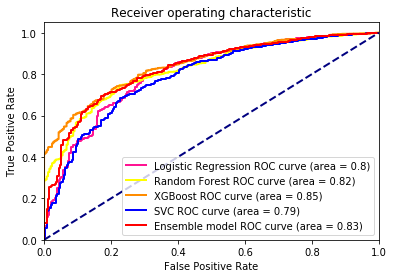

In [61]:
modeling2(X1, Y)

The result of Logistic Regression model:
Overall classification accuracy:75.2147%
f1-score:0.5756
AUC value:0.7353
[[ 181   72]
 [ 765 2359]]
             Default  Non-default
Default          181           72
Non-default      765         2359 

                            OLS Regression Results                            
Dep. Variable:                     re   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     61.93
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.74e-249
Time:                        09:18:46   Log-Likelihood:                 291.96
No. Observations:                6855   AIC:                            -537.9
Df Residuals:                    6832   BIC:                            -380.8
Df Model:                          22                                         
Covariance Type:            nonrobust      

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:75.6589%
f1-score:0.5716
AUC value:0.7141
[[ 168   85]
 [ 737 2387]]
             Default  Non-default
Default          168           85
Non-default      737         2387 

The result of XGBoost model:
Overall classification accuracy:92.8339%
f1-score:0.5697
AUC value:0.549
[[  26  227]
 [  15 3109]]
             Default  Non-default
Default           26          227
Non-default       15         3109 

The result of Support Machine Classifier model:
Overall classification accuracy:70.9505%
f1-score:0.5467
AUC value:0.7213
[[ 186   67]
 [ 914 2210]]
             Default  Non-default
Default          186           67
Non-default      914         2210 

The result of Ensemble model:
Overall classification accuracy:86.9707%
f1-score:0.6485
AUC value:0.7044
[[ 129  124]
 [ 316 2808]]
             Default  Non-default
Default          129          124
Non-default      316         2808 



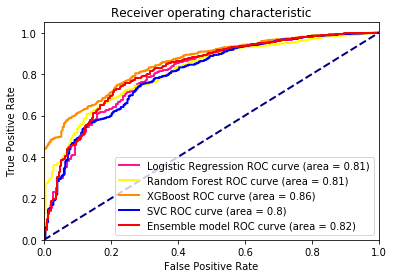

In [62]:
modeling2(X2, Y)

The result of Logistic Regression model:
Overall classification accuracy:59.9052%
f1-score:0.4601
AUC value:0.6053
[[ 155   98]
 [1256 1868]]
             Default  Non-default
Default          155           98
Non-default     1256         1868 

                            OLS Regression Results                            
Dep. Variable:                     re   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     31.02
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.33e-42
Time:                        09:19:20   Log-Likelihood:                -224.25
No. Observations:                6855   AIC:                             464.5
Df Residuals:                    6847   BIC:                             519.2
Df Model:                           7                                         
Covariance Type:            nonrobust      

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of XGBoost model:
Overall classification accuracy:92.5081%
f1-score:0.4805
AUC value:0.5
[[   0  253]
 [   0 3124]]
             Default  Non-default
Default            0          253
Non-default        0         3124 



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The result of Support Machine Classifier model:
Overall classification accuracy:44.4477%
f1-score:0.3811
AUC value:0.6216
[[ 210   43]
 [1833 1291]]
             Default  Non-default
Default          210           43
Non-default     1833         1291 

The result of Ensemble model:
Overall classification accuracy:92.5081%
f1-score:0.4805
AUC value:0.5
[[   0  253]
 [   0 3124]]
             Default  Non-default
Default            0          253
Non-default        0         3124 



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


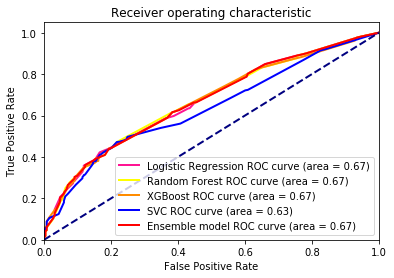

In [63]:
modeling2(X3, Y)

The result of Logistic Regression model:
Overall classification accuracy:77.7613%
f1-score:0.5931
AUC value:0.74
[[ 176   77]
 [ 674 2450]]
             Default  Non-default
Default          176           77
Non-default      674         2450 

                            OLS Regression Results                            
Dep. Variable:                     re   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.23e-272
Time:                        09:19:47   Log-Likelihood:                 328.08
No. Observations:                6855   AIC:                            -626.2
Df Residuals:                    6840   BIC:                            -523.7
Df Model:                          14                                         
Covariance Type:            nonrobust        

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:75.1259%
f1-score:0.5788
AUC value:0.7475
[[ 188   65]
 [ 775 2349]]
             Default  Non-default
Default          188           65
Non-default      775         2349 

The result of XGBoost model:
Overall classification accuracy:92.7747%
f1-score:0.5744
AUC value:0.5523
[[  28  225]
 [  19 3105]]
             Default  Non-default
Default           28          225
Non-default       19         3105 

The result of Support Machine Classifier model:
Overall classification accuracy:74.6224%
f1-score:0.5749
AUC value:0.7448
[[ 188   65]
 [ 792 2332]]
             Default  Non-default
Default          188           65
Non-default      792         2332 

The result of Ensemble model:
Overall classification accuracy:87.859%
f1-score:0.6594
AUC value:0.7092
[[ 129  124]
 [ 286 2838]]
             Default  Non-default
Default          129          124
Non-default      286         2838 



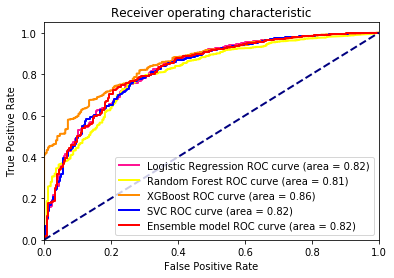

In [64]:
modeling2(X4, Y)

The result of Logistic Regression model:
Overall classification accuracy:77.8206%
f1-score:0.5936
AUC value:0.7403
[[ 176   77]
 [ 672 2452]]
             Default  Non-default
Default          176           77
Non-default      672         2452 

                            OLS Regression Results                            
Dep. Variable:                     re   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     91.77
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          8.68e-274
Time:                        09:20:11   Log-Likelihood:                 335.46
No. Observations:                6855   AIC:                            -636.9
Df Residuals:                    6838   BIC:                            -520.8
Df Model:                          16                                         
Covariance Type:            nonrobust      

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The result of Random Forest model:
Overall classification accuracy:75.5404%
f1-score:0.5798
AUC value:0.7425
[[ 184   69]
 [ 757 2367]]
             Default  Non-default
Default          184           69
Non-default      757         2367 

The result of XGBoost model:
Overall classification accuracy:92.9523%
f1-score:0.5795
AUC value:0.5551
[[  29  224]
 [  14 3110]]
             Default  Non-default
Default           29          224
Non-default       14         3110 

The result of Support Machine Classifier model:
Overall classification accuracy:75.0666%
f1-score:0.5783
AUC value:0.7472
[[ 188   65]
 [ 777 2347]]
             Default  Non-default
Default          188           65
Non-default      777         2347 

The result of Ensemble model:
Overall classification accuracy:87.711%
f1-score:0.662
AUC value:0.7174
[[ 134  119]
 [ 296 2828]]
             Default  Non-default
Default          134          119
Non-default      296         2828 



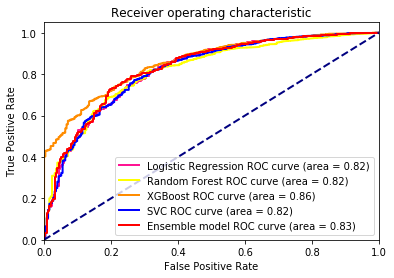

In [65]:
modeling2(X5, Y)

## Inpection of Logistic Regression Model

Inspect the statistic significance between the LR model and the parameters in the best model

探究最佳模型中逻辑回归模型中参数和模型之间关系是否统计显著

## Conclusion
the best model is obtained by original features processed by removing those with weak correlation to the target feature and those mutual correlated with each other, and those with multicolinearity.

The models obtained without polynomial features performance better.
The VIF threshold is set as 2.5, variables with VIF value above 2.5 are filtered.

The number of trees in the random forest is optimised as 50.

The imbalancing of dataset is solved by SMOTE-Tomlink method of oversampling and subsampling data.

数据变量名意义：

X1 - 多项式变量，设置VIF上限为5

X2 - 多项式变量，设置VIF上限为10

X3 - 多项式变量，设置VIF上限为2.5

X4 - 原始变量，设置VIF上限为2.5

X5 - 原始变量，设置VIF上限为5

The result of Logistic Regression model:
Overall classification accuracy:79.5973%
f1-score:0.6088
AUC value:0.7499
[[ 176   77]
 [ 612 2512]]
             Default  Non-default
Default          176           77
Non-default      612         2512 



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     603.9
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:20:39   Log-Likelihood:                -5904.7
No. Observations:               12596   AIC:                         1.184e+04
Df Residuals:                   12581   BIC:                         1.195e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5217      0.018     29.569      0.0

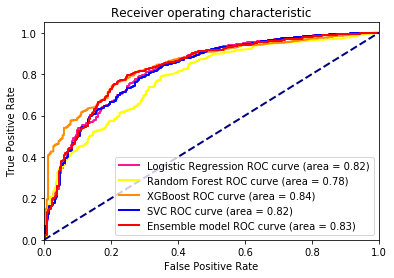

In [66]:
modeling(X4, Y)

## Further work to improve the performance

最佳模型AUC value = 0.77

Feature Engineering 阶段可以根据实际情况筛选或生成对预测模型更有价值的变量

可以调整Ensemble Model中不同模型预测结果所占的权重，或者在Ensemble Model中加入新的（或数量更多的）预测模型来优化模型的预测能力

The best model obtains AUC value = 0.77

Expert knowledge could be applied in feature engineering stage to improve performance. 

The weight of each model in ensemble model could be optimised to improve the performance.

